### Day 2: Data Cleaning with Pandas

**Project Name**: Titanic Survival Data Cleaning  
**Skills Demonstrated**: Handling missing values, data transformation, feature engineering, and basic exploratory analysis.  
**Learnings**: Cleaned and preprocessed the Titanic dataset for further analysis or modeling, gaining insights into common data cleaning challenges.

#### Enhanced Steps

1. **Dataset Overview**  
2. **Handling Missing Values**  
3. **Encoding Categorical Variables**  
4. **Feature Engineering**  
5. **Outlier Detection and Removal**  
6. **Scaling Numerical Features**  
7. **Data Visualization for Cleaning Verification**  


In [10]:

# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset
file_path = '/content/titanic.csv'  # Update with your file path
df = pd.read_csv(file_path)

# Displaying the first few rows of the dataset
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
df.shape

(891, 12)

Understanding the Dataset
Key Columns:

- Survived: Target column indicating survival (1) or death (0).
- Pclass: Passenger class (1st, 2nd, 3rd).
- Age, Fare: Numerical columns.
- Sex, Embarked: Categorical columns.

In [12]:
# Basic information about the dataset
df.info()

# Descriptive statistics for numerical columns
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Step 1: Handling Missing Values**

In [13]:
# Checking for missing values
missing_values = df.isnull().sum()
print(missing_values)

# Handling missing values
# - Fill missing 'Age' with the median
df['Age'].fillna(df['Age'].median(), inplace=True)

# - Fill missing 'Embarked' with the mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Dropping the 'Cabin' column due to high missing values
df.drop(columns=['Cabin'], inplace=True)

# Verifying that missing values have been handled
print(df.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


**Step 2: Encoding Categorical Variables**

In [14]:
# Encoding 'Sex' and 'Embarked' columns
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Verifying the transformations
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,False,True
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,False,True


**Step 3: Feature Engineering**

In [15]:
# Creating new features
# - Family Size
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# - IsAlone (1 if passenger is alone, 0 otherwise)
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

# Dropping unnecessary columns
df.drop(columns=['Name', 'Ticket'], inplace=True)

# Verifying the new features
df.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,FamilySize,IsAlone
0,1,0,3,0,22.0,1,0,7.2500,False,True,2,0
1,2,1,1,1,38.0,1,0,71.2833,False,False,2,0
2,3,1,3,1,26.0,0,0,7.9250,False,True,1,1
3,4,1,1,1,35.0,1,0,53.1000,False,True,2,0
4,5,0,3,0,35.0,0,0,8.0500,False,True,1,1


**Step 4: Outlier Detection and Removal**

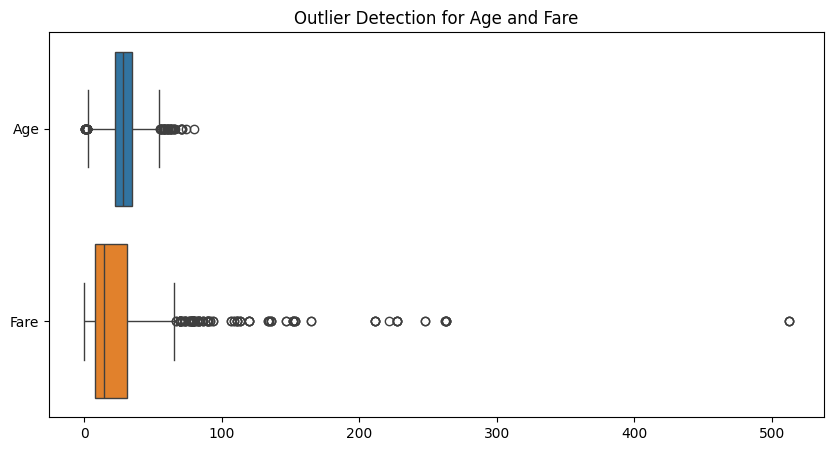

,Fare
count,775.000000
mean,17.822091
std,13.578085
min,0.000000
25%,7.895800
50%,13.000000
75%,26.000000
max,65.000000


In [16]:
# Using boxplots to visualize outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['Age', 'Fare']], orient='h')
plt.title('Outlier Detection for Age and Fare')
plt.show()

# Removing outliers in 'Fare' using IQR
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]

# Verifying outlier removal
df['Fare'].describe()


**Step 6: Scaling Numerical Features**

In [18]:
from sklearn.preprocessing import StandardScaler

# Columns to scale
num_cols = ['Age', 'Fare']

# Applying StandardScaler
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Verifying scaled values
df[num_cols].head()


,Age,Fare
0,-0.528321,-0.779117
2,-0.215182,-0.729373
3,0.489381,2.599828
4,0.489381,-0.720161
5,-0.058613,-0.690071


**Step 7: Data Visualization for Cleaning Verification**

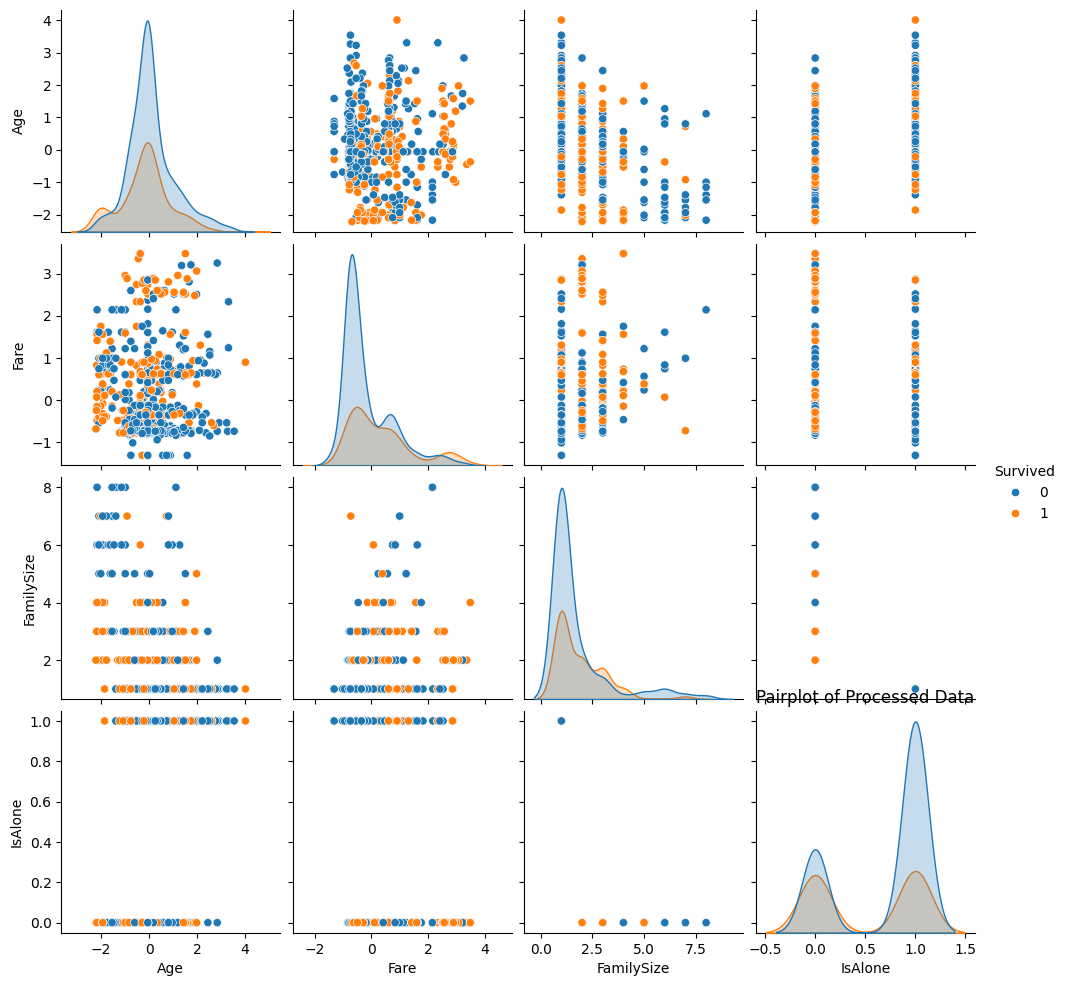

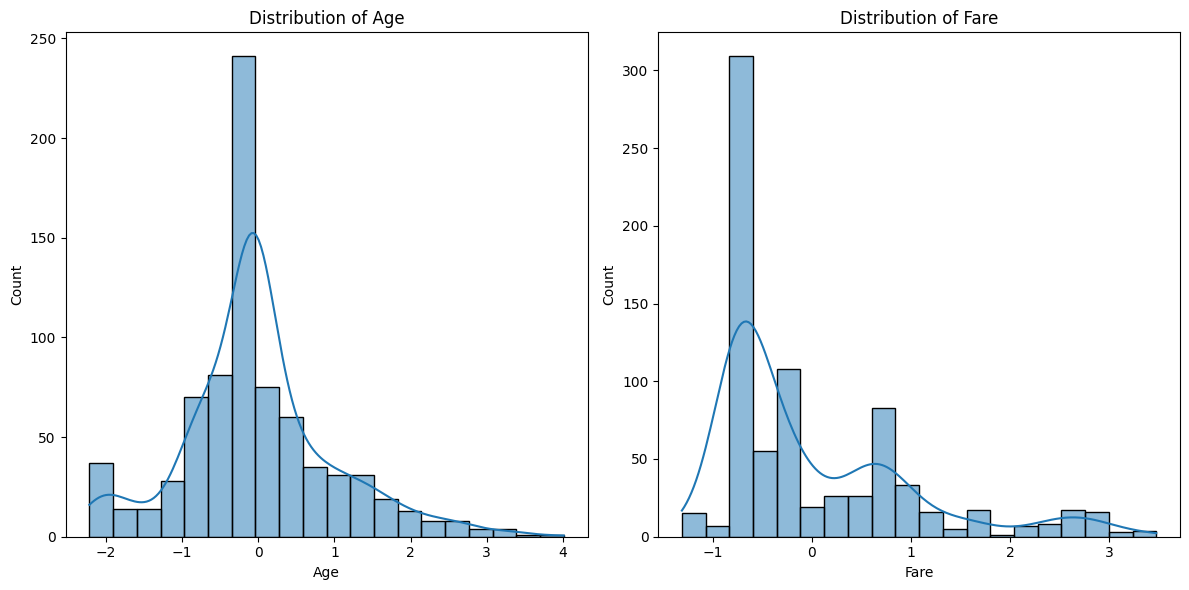

In [19]:
# Pairplot to visualize the relationships and distributions
sns.pairplot(df[['Survived', 'Age', 'Fare', 'FamilySize', 'IsAlone']], hue='Survived')
plt.title('Pairplot of Processed Data')
plt.show()

# Distribution of numerical columns
plt.figure(figsize=(12, 6))
for i, col in enumerate(['Age', 'Fare'], 1):
    plt.subplot(1, 2, i)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

**Step 5: Data Export**

In [20]:
# Saving the cleaned dataset to a new CSV file
cleaned_file_path = 'cleaned_titanic_data.csv'
df.to_csv(cleaned_file_path, index=False)

# Confirming the export
print(f"Cleaned data exported to {cleaned_file_path}")

Cleaned data exported to cleaned_titanic_data.csv


**Learnings**
1. Data Cleaning Techniques: Mastered handling missing values, encoding categorical data, and identifying outliers using statistical methods.
2. Feature Engineering: Developed new features to enhance the dataset's predictive power.
3. Real-World Data Challenges: Practiced dealing with messy data and creating a structured dataset ready for analysis or machine learning.